# importing needed libraries

In [1]:
!pip install pydot


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import pydot

In [11]:
#load_dataset function to load the data and resize the images to 50x50
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

In [12]:
#display_images function to show examples
def display_images(x_data,y_data, title, display_label = True):
    x, y = x_data,y_data
    fig, axes = plt.subplots(5, 8, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
        if display_label:
            ax.set_xlabel(uniq_labels[y[i]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [13]:
#loading_dataset into X_pre and Y_pre
data_dir = r'C:\Users\84396\Desktop\Sign-Language-Recognition-main\dataset\train'
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)
print(X_pre.shape, Y_pre.shape)

(40500, 50, 50, 3) (40500,)


In [14]:
#spliting dataset into 80% train, 10% validation and 10% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, test_size = 0.2)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size = 0.5)

In [15]:
%matplotlib notebook

Train images shape (32400, 50, 50, 3) (32400,)
Test images shape (4050, 50, 50, 3) (4050,)
Evaluate image shape (4050, 50, 50, 3) (4050,)
Printing the labels ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Znothing'] 27


<IPython.core.display.Javascript object>


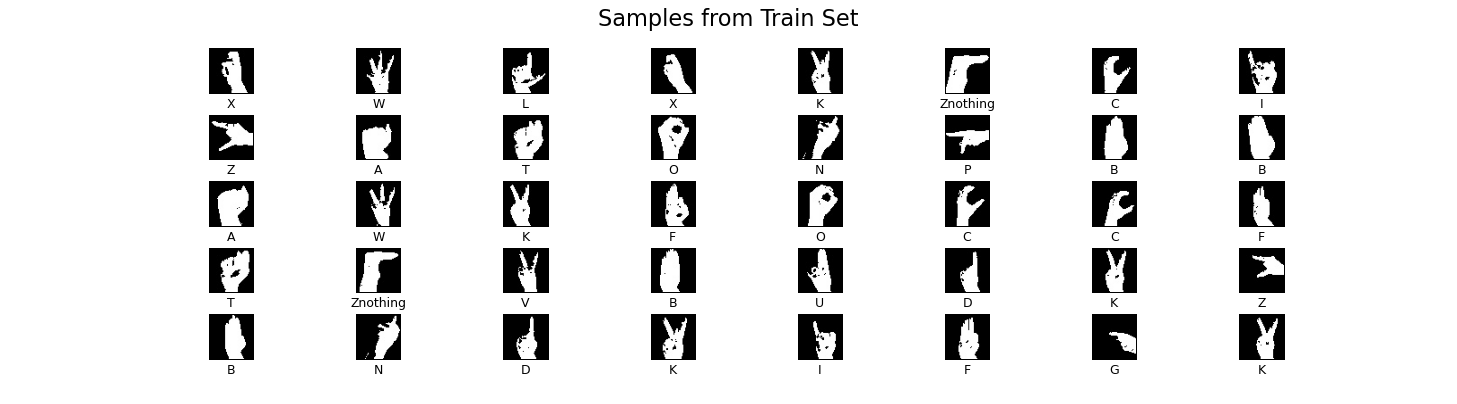

<IPython.core.display.Javascript object>


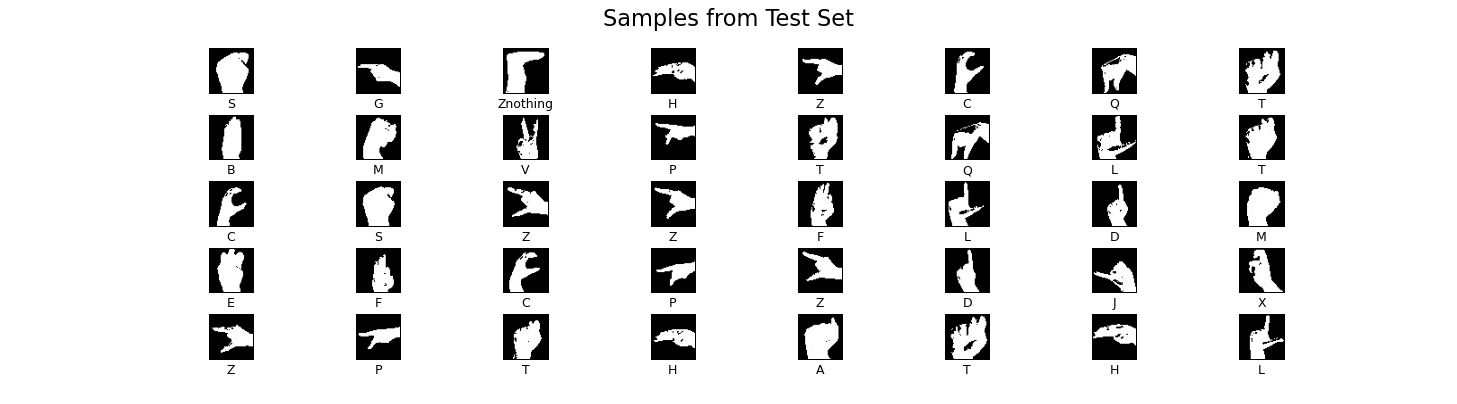

<IPython.core.display.Javascript object>


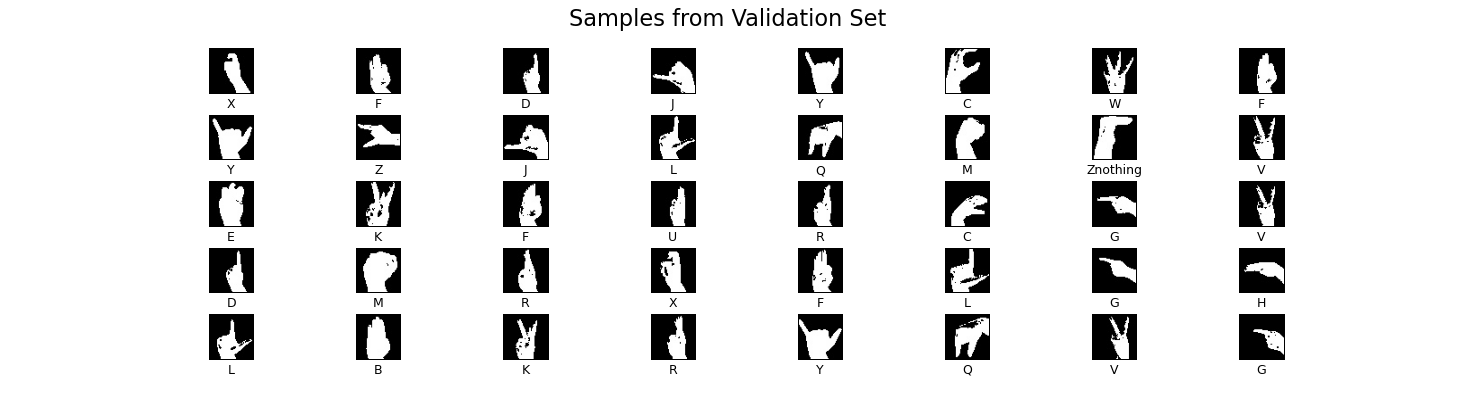

In [16]:
#print shapes and show examples for each set
print("Train images shape",X_train.shape, Y_train.shape)
print("Test images shape",X_test.shape, Y_test.shape)
print("Evaluate image shape",X_eval.shape, Y_eval.shape)
print("Printing the labels",uniq_labels, len(uniq_labels))
display_images(X_train,Y_train,'Samples from Train Set')
display_images(X_test,Y_test,'Samples from Test Set')
display_images(X_eval,Y_eval,'Samples from Validation Set')

In [17]:
# converting Y_tes and Y_train to One hot vectors using to_categorical
# example of one hot => '1' is represented as [0. 1. 0. . . . . 0.]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_eval = to_categorical(Y_eval)
X_train = X_train / 255.
X_test = X_test/ 255.
X_eval = X_eval/ 255.

In [18]:
# building our model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(27, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

In [19]:
#compiling the model
#default batch size 32
#default learning rate is 0.001
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

In [20]:
#start training(fitting) the data
history = model.fit(X_train, Y_train, epochs=20, verbose=1,
                validation_data=(X_eval, Y_eval))

Epoch 1/20
1013/1013 [==============================] - 136s 132ms/step - loss: 0.2462 - accuracy: 0.9253 - val_loss: 0.0214 - val_accuracy: 0.9921
Epoch 2/20
1013/1013 [==============================] - 130s 129ms/step - loss: 0.0285 - accuracy: 0.9920 - val_loss: 0.0366 - val_accuracy: 0.9926
Epoch 3/20
1013/1013 [==============================] - 136s 134ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 4/20
1013/1013 [==============================] - 133s 131ms/step - loss: 0.0144 - accuracy: 0.9961 - val_loss: 2.9377e-04 - val_accuracy: 1.0000
Epoch 5/20
1013/1013 [==============================] - 140s 138ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 1.7045e-05 - val_accuracy: 1.0000
Epoch 6/20
1013/1013 [==============================] - 129s 127ms/step - loss: 5.2698e-06 - accuracy: 1.0000 - val_loss: 7.5452e-06 - val_accuracy: 1.0000
Epoch 7/20
1013/1013 [==============================] - 135s 134ms/step - loss: 2.1708e-06 - acc

In [21]:
#testing
model.evaluate(X_test, Y_test)

127/127 [==============================] - 4s 30ms/step - loss: 4.7389e-09 - accuracy: 1.0000


[4.738921255409423e-09, 1.0]

In [22]:
#save the model
model.save(r'C:\Users\84396\Desktop\Sign-Language-Recognition-main\new_model_20.h5')

In [23]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>


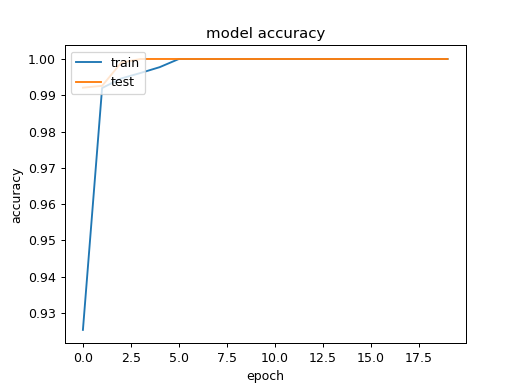

In [28]:
import matplotlib.pyplot as plt
%matplotlib notebook
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


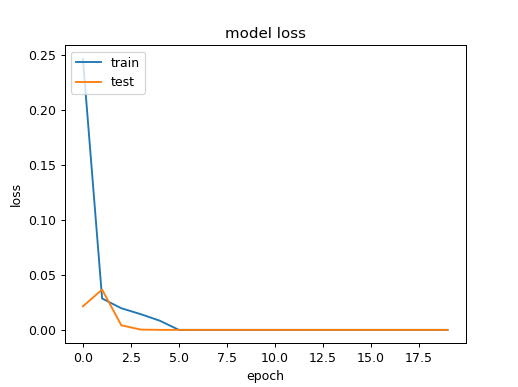

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred.round()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
accuracy_score(Y_test, y_pred.round())*100

100.0

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred.round(), Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       155
           4       1.00      1.00      1.00       153
           5       1.00      1.00      1.00       137
           6       1.00      1.00      1.00       160
           7       1.00      1.00      1.00       139
           8       1.00      1.00      1.00       163
           9       1.00      1.00      1.00       138
          10       1.00      1.00      1.00       133
          11       1.00      1.00      1.00       140
          12       1.00      1.00      1.00       151
          13       1.00      1.00      1.00       132
          14       1.00      1.00      1.00       144
          15       1.00      1.00      1.00       184
          16       1.00      1.00      1.00       161
          17       1.00    